In [1]:
from multi_agent.main_agent import build_graph
from langgraph.store.memory import InMemoryStore
from langchain.embeddings import init_embeddings
from dotenv import load_dotenv


load_dotenv()
def init_store() -> InMemoryStore:
    return InMemoryStore(
        index={
            "embed": init_embeddings("openai:text-embedding-3-small"),
            "dims": 1536,
        }
    )
store = init_store()
graph = build_graph(store)

c:\Users\Stefano\OneDrive\Desktop\LLM_Agent_Cybersecurity_Forensic\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Stefano\AppData\Local\Temp\ipykernel_356\4026092212.py:11: LangChainBetaWarning: The function `init_embeddings` is in beta. It is actively being worked on, so the API may change.
  "embed": init_embeddings("openai:text-embedding-3-small"),


In [2]:
from IPython.display import Image, display,Markdown

try:
    #display(Image(graph.get_graph().draw_mermaid_png()))
    display(Markdown(f"```mermaid\n{graph.get_graph().draw_mermaid()}\n```"))
    #Copy and paste the markdown into: https://mermaid.live to obtain the image
except Exception as e:
    print(e)

```mermaid
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	main_agent(main_agent)
	tools(tools)
	log_reporter(log_reporter)
	pcap_flows_reporter(pcap_flows_reporter)
	__end__([<p>__end__</p>]):::last
	__start__ --> log_reporter;
	pcap_flows_reporter --> main_agent;
	log_reporter -.-> pcap_flows_reporter;
	log_reporter -.-> main_agent;
	main_agent -.-> tools;
	main_agent -.-> __end__;
	tools -.-> main_agent;
	tools -.-> log_reporter;
	tools -.-> __end__;
	main_agent -.-> main_agent;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

```

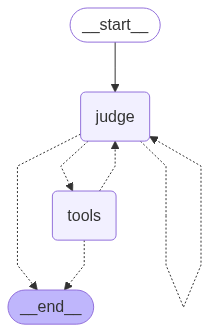

In [ ]:
#Draw the judge agent graph
from llm_as_a_judge import build_graph
from dotenv import load_dotenv


load_dotenv()
graph = build_graph()

from IPython.display import Image, display,Markdown

try:
    #display(Image(graph.get_graph().draw_mermaid_png()))
    display(Image(graph.get_graph().draw_mermaid_png()))
    #Copy and paste the markdown into: https://mermaid.live to obtain the image
except Exception as e:
    print(e)